# <center>**Challenge 1: Titanic - Machine Learning from Disaster**<center>
In this competition, you‚Äôll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the ‚Äúground truth‚Äù.

The test.csv dataset contains similar information but does not disclose the ‚Äúground truth‚Äù for each passenger. It‚Äôs your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

**Goal**
- It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

**Metric**
- Your score is the percentage of passengers you correctly predict. This is known as accuracy.

## **Import libraries**

In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')  # Hide future warnings

## **Load data**

In [43]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **Data preview**

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
gender_data = pd.read_csv("gender_submission.csv")
gender_data.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [49]:
print('Train columns:', train_data.columns.tolist())
print("Shape of train data:", train_data.shape)
print('\nTest columns:', test_data.columns.tolist())
print("Shape of test data:", test_data.shape)
print('\nGender columns:', gender_data.columns.tolist())
print("Shape of gender submission data:", gender_data.shape)

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Shape of train data: (891, 12)

Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Shape of test data: (418, 11)

Gender columns: ['PassengerId', 'Survived']
Shape of gender submission data: (418, 2)


In [50]:
# Number of total passengers
total = len(train_data)
print("Passengers on board the Titanic:", total)

# Number of passengers under 18 (ignore missing ages)
minors = train_data['Age'].dropna().apply(lambda x: x < 18).sum()
print("Numbers of passengers who are under the age of 18:", minors)

# Number of passengers who survived
survived = (train_data['Survived'] == 1).sum()
print("Numbers of passengers survived:", survived)

Passengers on board the Titanic: 891
Numbers of passengers who are under the age of 18: 113
Numbers of passengers survived: 342


In [51]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


**Women and children** were the first to board the titanic which means they are more likely to survive than men

In [52]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, the submission file in gender_submission.csv is not a bad first guess!

## **Visualization**

In [53]:
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

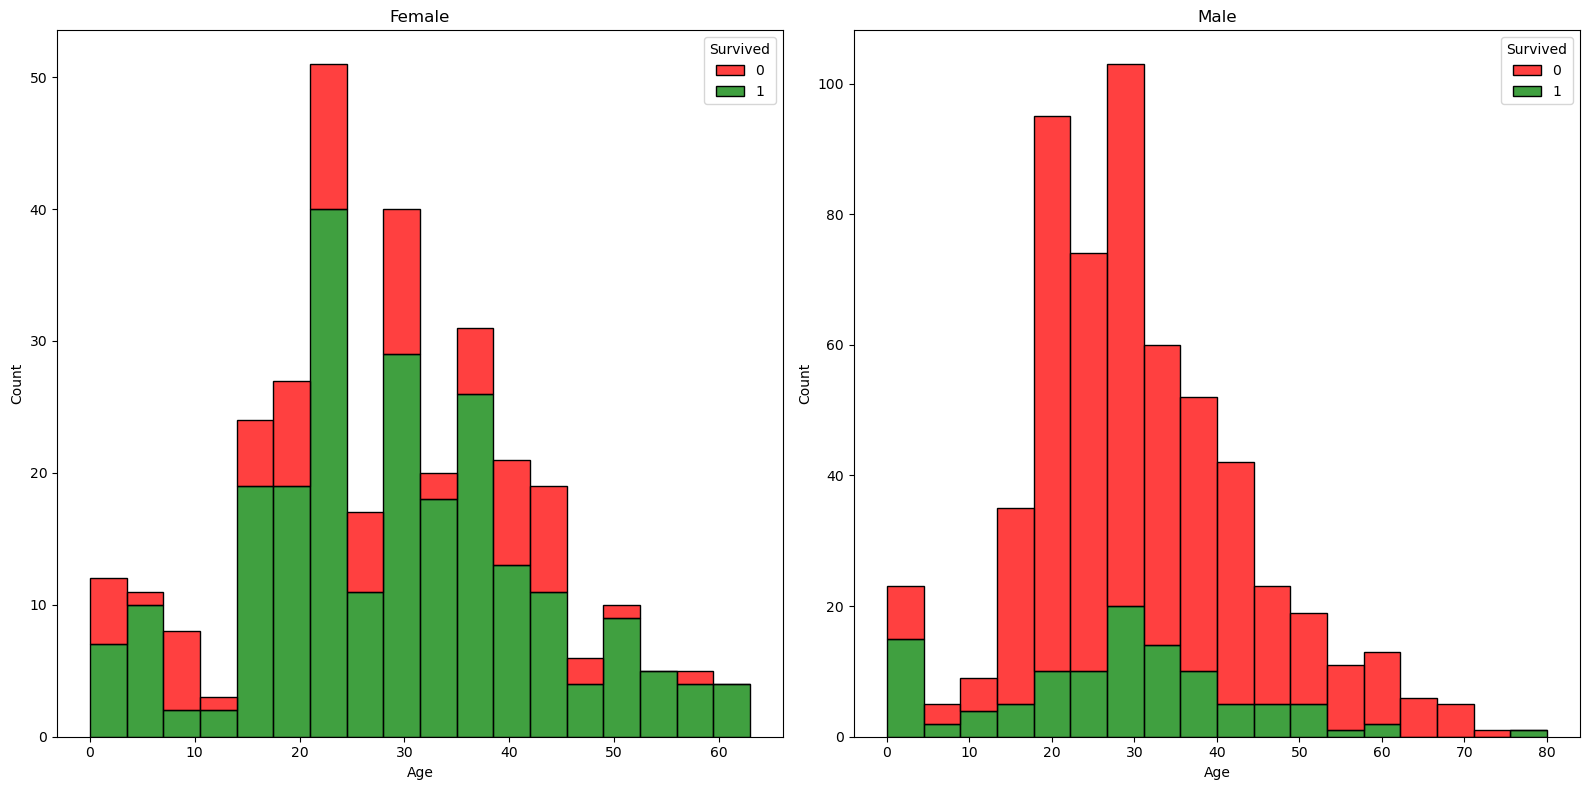

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Filter data
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']

# Female plot
sns.histplot(data=women, x='Age', bins=18, hue='Survived', multiple='stack',
             palette={1: 'green', 0: 'red'}, ax=axes[0])
axes[0].set_title('Female')

# Male plot
sns.histplot(data=men, x='Age', bins=18, hue='Survived', multiple='stack',
             palette={1: 'green', 0: 'red'}, ax=axes[1])
axes[1].set_title('Male')

plt.tight_layout()
plt.show()

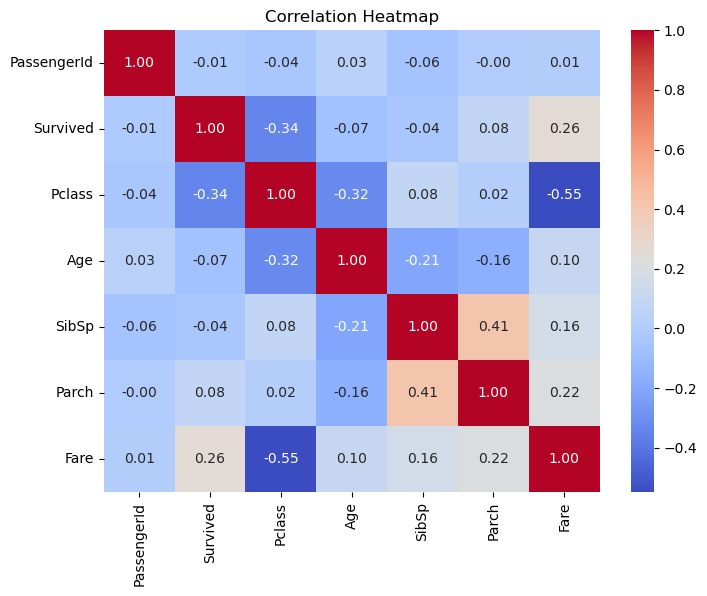

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

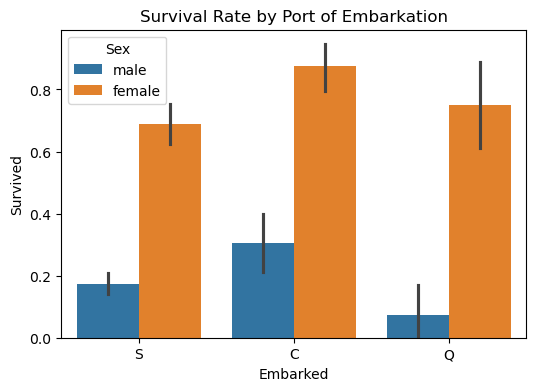

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Sex')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

In [57]:
fig = px.scatter_3d(train_data, x='PassengerId', y='Sex', z='Age',
                    color='Age')

fig.show()

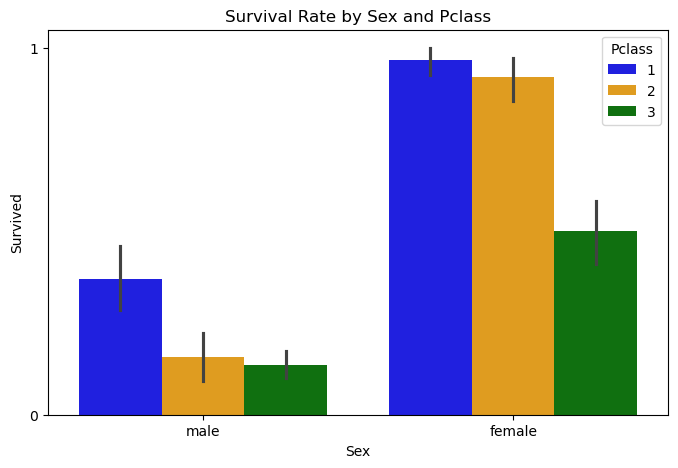

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=train_data,
    x='Sex',
    y='Survived',
    hue='Pclass',
    hue_order=[1, 2, 3],
    palette={1: 'blue', 2: 'orange', 3: 'green'}
)
plt.gca().invert_yaxis()  # run this if it's upside down, again if you want to flip back
plt.title('Survival Rate by Sex and Pclass')
plt.show()

In [59]:
# Convert 'Survived' to string so Plotly treats it as categorical
train_data['Survived'] = train_data['Survived'].astype(str)

fig = px.scatter(
    train_data, 
    x = 'PassengerId', 
    y = 'Age', 
    color = 'Survived',
    facet_col = 'Pclass',        # columns by class
    facet_row = 'Sex',           # rows by gender
    title='Which Age Survived by Passenger Class and Gender?',
    color_discrete_map = {'0': 'red', '1': 'green'},  # <-- manual color mapping
    category_orders={'Pclass': [3, 2, 1]},
    log_x = True,
    size_max = 20,
    template = 'plotly'
)

fig.update_layout(
    height=800,
    width=1000,
    title_x=0.5,
    legend_title_text = 'Survived'
)

fig.show()

### Survival Distribution by Age, Gender, and Passenger Class

The scatter plot below explores how **age**, **gender**, and **passenger class (Pclass)** relate to survival outcomes on the Titanic dataset.

Each point represents a passenger:
- **Red dots (0)** ‚Üí Did not survive  
- **Green dots (1)** ‚Üí Survived  

The plot is separated by:
- **Columns** ‚Üí Passenger Class (`Pclass = 3, 2, 1`)
- **Rows** ‚Üí Gender (`Sex = male / female`)

### Observations:
- **Females in higher classes (Pclass 1 & 2)** show a much higher survival rate (more green points).
- **Males**, especially in **Pclass 3**, had the lowest survival rate (mostly red points).
- **Younger passengers** have a slightly better chance of survival across all classes ‚Äî possibly due to evacuation priority for women and children.
- **Older passengers** were less likely to survive, especially men in lower classes.

### Insight:
This visualization clearly supports the "women and children first" evacuation principle and shows that **socioeconomic status (class)** and **gender** strongly influenced survival odds.


## **Machine Learning**

In [60]:
data = train_data.copy()

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical columns
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    data[col] = label.fit_transform(data[col])

# Define features and target
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = data['Survived'].astype(int)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Models ---
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

RandomForest Accuracy: 0.8268
GradientBoosting Accuracy: 0.8156
LogisticRegression Accuracy: 0.8156


## **Model Comparison and Evaluation**

In this section, we compared the performance of three different machine learning algorithms on the Titanic dataset:

- **Random Forest Classifier**
- **Gradient Boosting Classifier**
- **Logistic Regression**

All three models were trained using the same preprocessed data (features: *Pclass, Sex, Age, Fare, SibSp, Parch, Embarked*) and evaluated on a validation set (20% split).

The bar chart below summarizes their **accuracy scores**. Each value above the bar indicates the model's validation accuracy.

### **Observations**
- The **Random Forest** and **Gradient Boosting** models generally performed better than Logistic Regression, since they can capture non-linear relationships and interactions between variables.
- **Logistic Regression** still provides a strong baseline and helps confirm that tree-based models are adding value.
- The difference between Random Forest and Gradient Boosting may vary depending on hyperparameters and data balancing.

### **Conclusion**
Based on the results, we selected the model with the **highest accuracy** to generate predictions for the test dataset and create the final Kaggle submission file (`submission.csv`).

Further improvements could involve:
- Hyperparameter tuning (using GridSearchCV or RandomizedSearchCV)
- Feature engineering (e.g., creating family size, title extraction)
- Cross-validation for more robust performance estimation.


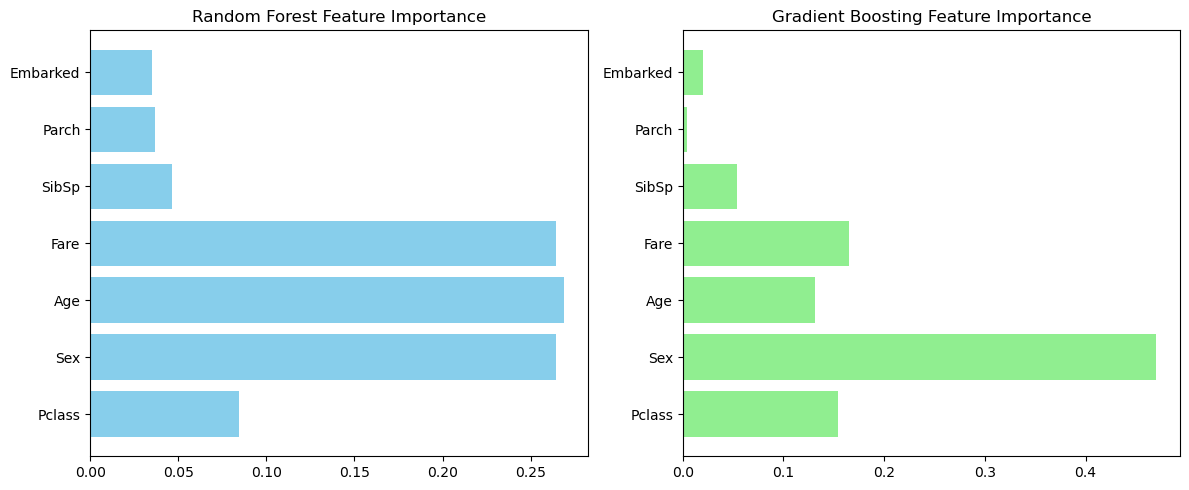

In [61]:
# Get feature importances
rf_importance = models['RandomForest'].feature_importances_
gb_importance = models['GradientBoosting'].feature_importances_

feature_names = X.columns

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].barh(feature_names, rf_importance, color='skyblue')
axes[0].set_title('Random Forest Feature Importance')

axes[1].barh(feature_names, gb_importance, color='lightgreen')
axes[1].set_title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()

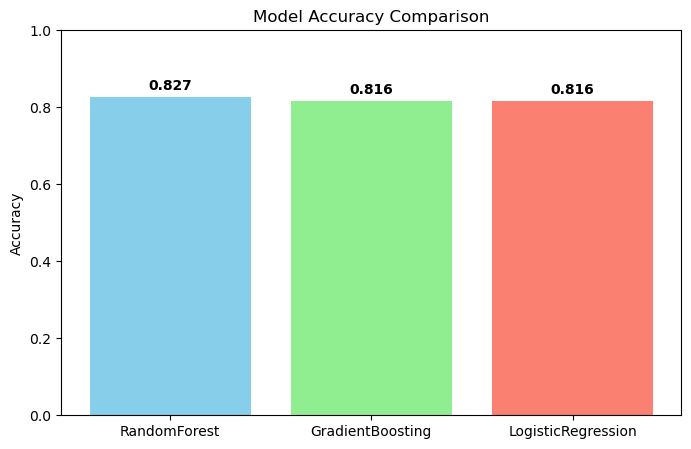

In [62]:
# Plot model accuracy comparison
plt.figure(figsize=(8,5))
bars = plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [63]:
# Find the best model by accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"‚úÖ Best model: {best_model_name} with accuracy = {results[best_model_name]:.4f}")

test_data_copy = test_data.copy()
test_data_copy['Age'].fillna(data['Age'].median(), inplace=True)
test_data_copy['Fare'].fillna(data['Fare'].median(), inplace=True)
test_data_copy['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

for col in ['Sex', 'Embarked']:
    test_data_copy[col] = label.fit_transform(test_data_copy[col])

X_test = test_data_copy[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]

test_preds = best_model.predict(X_test)

# --- Create submission DataFrame ---
submission = pd.DataFrame({
    'PassengerId': test_data_copy['PassengerId'],
    'Survived': test_preds
})

# --- Save to CSV ---
submission.to_csv('submission.csv', index=False)

print("üíæ Submission file 'submission.csv' created successfully!")
submission.head()

‚úÖ Best model: RandomForest with accuracy = 0.8268
üíæ Submission file 'submission.csv' created successfully!


PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

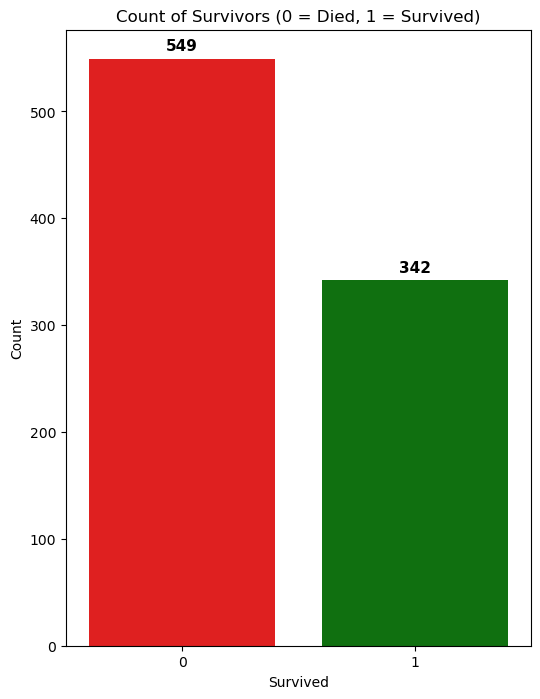

In [64]:
plt.figure(figsize=(6,8))
ax = sns.countplot(data=train_data, x='Survived', palette=['red', 'green'])
plt.title('Count of Survivors (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, count + 5,  # adjust "+5" if needed
            f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()